# Анализ автомобилей Hyundai Solaris в г. Москве и МО

# Краткое описание предметной области и исходных данных
<font size = 3><div style="text-align: justify">В качестве анализируемой информации выступают данные о ценах предложения на рынке транспортных средств (Hyundai Solaris 2011-2016 годов выпуска) в городе Москве и Московской области. В процессе анализа на 1 этапе было собрано 300 данных о ценах предложения. К основным ценообразующим факторам относятся: год выпуска (хронологический возраст), пробег, тип кузова (седан/хэтчбек), объем двигателя, тип коробки передач (АТ/МТ), состояние автомобиля, цвет кузова, количество владельцев. Факторы, которые не были учтены в силу невозможности их объективного установления: комплектация, дубликат ПТС, наличие серьезных аварий и ремонтов, наличие долгов по штрафам, использование в такси и каршеринге. По всем ценообразующим факторам собрана информация и выгружена в таблицу Excel (.xlsx).
Имеется потребность в анализе рынка транспортных средств и ценообразования на нем с целью построения оценочных математических моделей, предсказывающих стоимость транспортных средств в зависимости от основных ценообразующих факторов.</div></font>

# Формулировка цели и постановка задач
<font size = 3><div style="text-align: justify">**Цель:** создание качественной математической модели для оценки стоимости транспортных средств (Hyundai Solaris) в зависимости от основных ценообразующих факторов.</div></font>

<font size = 3>**Задачи:**
1. Сбор данных, загрузка в jupyter и их обработка.
2. Анализ данных на наличие выбросов.
3. Анализ данных на соответствие нормальному закону распределения (построение гистограммы).
4. Вывод основных показателей (описательная статистика).
4. Анализ данных на наличие существенных отклонений между признаками.
5. Поиск и анализ взаимосвязей между ценой и ценообразующими факторами.
6. Отбор ценообразующих факторов.
7. Постороение модели (обучение).
8. Проверка качества модели (тестирование).</font>

In [263]:
!pip install adtk

In [265]:
!pip install pmdarima

In [86]:
# Импортируем необходиимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import pylab
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from operator import itemgetter, attrgetter, methodcaller
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
%run f2forecast.py # заранее написанная функци, которая позволяет перебрать все варианты линейных моделей регрессии
# данный файл располагается в месте C:\Users\skapr\Documents, именно сюда ссылается юпитер
# при запуске данного алгоритма пришлось установить 2 библиотеки adtk и pmdarima

<Figure size 432x288 with 0 Axes>

In [5]:
# Загрузка данных о транспортных средствах
df=pd.read_excel('D:\Философия\Машинное обучение\Модуль 3\Регрессия\ДЗ/Выборка ТС.xlsx', sheet_name = 0)
df.head()

,Марка,Модель,Цена,Год,Пробег,Кузов,Двигатель,Коробка,Состояние,Цвет,Владельцы
0,Hyundai,Solaris I,860000,2015,180981,седан,1.6,AT,не требует ремонта,белый,1
1,Hyundai,Solaris I,749000,2014,113537,седан,1.6,MT,не требует ремонта,серый,3
2,Hyundai,Solaris I,745000,2012,127639,хэтчбек,1.6,AT,не требует ремонта,фиолетовый,1
3,Hyundai,Solaris I,515000,2012,225555,седан,1.4,MT,не требует ремонта,черный,4
4,Hyundai,Solaris I,675000,2012,122000,седан,1.6,AT,не требует ремонта,черный,2


In [6]:
# Удаляем лишние столбцы (удалим состояние, так как у всех оно одинаковое, а также марку и модель)
df=df.drop(['Марка', 'Модель', 'Состояние'], axis=1)
df.head()

,Цена,Год,Пробег,Кузов,Двигатель,Коробка,Цвет,Владельцы
0,860000,2015,180981,седан,1.6,AT,белый,1
1,749000,2014,113537,седан,1.6,MT,серый,3
2,745000,2012,127639,хэтчбек,1.6,AT,фиолетовый,1
3,515000,2012,225555,седан,1.4,MT,черный,4
4,675000,2012,122000,седан,1.6,AT,черный,2


In [7]:
# Посмотрим пропуски
df.isnull().sum()

Цена         0
Год          0
Пробег       0
Кузов        0
Двигатель    0
Коробка      0
Цвет         0
Владельцы    0
dtype: int64

In [8]:
# Посмотрим типы данных в DataFrame
df.dtypes

Цена           int64
Год            int64
Пробег         int64
Кузов         object
Двигатель    float64
Коробка       object
Цвет          object
Владельцы      int64
dtype: object

In [9]:
# Получим из переменной "год" хронологический возраст транспортных средств и поместим его после переменной "год"
df_age = 2022 - df['Год']
df.insert(2, "Хр_возраст", df_age)
df.head(10)

,Цена,Год,Хр_возраст,Пробег,Кузов,Двигатель,Коробка,Цвет,Владельцы
0,860000,2015,7,180981,седан,1.6,AT,белый,1
1,749000,2014,8,113537,седан,1.6,MT,серый,3
2,745000,2012,10,127639,хэтчбек,1.6,AT,фиолетовый,1
3,515000,2012,10,225555,седан,1.4,MT,черный,4
4,675000,2012,10,122000,седан,1.6,AT,черный,2
5,725000,2011,11,124500,седан,1.6,AT,фиолетовый,4
6,795000,2013,9,106593,седан,1.4,AT,серый,1
7,770000,2014,8,83000,седан,1.6,AT,белый,1
8,670000,2012,10,196000,седан,1.4,AT,белый,1
9,720000,2012,10,150362,седан,1.6,AT,белый,2


In [10]:
# Удаляем переменную "год"
df=df.drop(['Год'], axis=1)
df.head(10)

,Цена,Хр_возраст,Пробег,Кузов,Двигатель,Коробка,Цвет,Владельцы
0,860000,7,180981,седан,1.6,AT,белый,1
1,749000,8,113537,седан,1.6,MT,серый,3
2,745000,10,127639,хэтчбек,1.6,AT,фиолетовый,1
3,515000,10,225555,седан,1.4,MT,черный,4
4,675000,10,122000,седан,1.6,AT,черный,2
5,725000,11,124500,седан,1.6,AT,фиолетовый,4
6,795000,9,106593,седан,1.4,AT,серый,1
7,770000,8,83000,седан,1.6,AT,белый,1
8,670000,10,196000,седан,1.4,AT,белый,1
9,720000,10,150362,седан,1.6,AT,белый,2


<AxesSubplot:xlabel='Цена'>

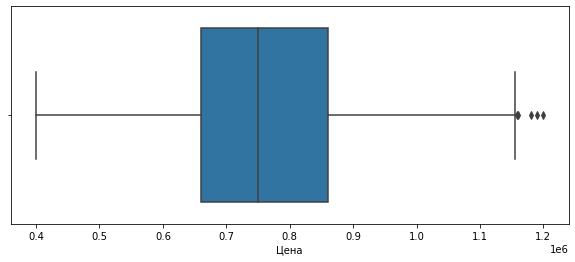

In [11]:
# Построим диаграмму ящик с усами по цене транспортных средств и пробегу
plt.figure(figsize=(10,4))
sns.boxplot(df['Цена'])

По диаграмме ящик с усами видно, что в выборке присутствует небольшое количество выбросов. Для более лучшего понимания, что делать с данными выбросами, необходимо посмотреть на эти данные. 

In [12]:
# Найдем границы выбросов для Цены
df_price=df['Цена']
df_price=df_price.sort_values()
print(df_price)

# Межквартильный размах
iqr=(df_price.quantile(q=0.75)-df_price.quantile(q=0.25))*1.5
print("Межквартильный размах: ", iqr)

# Расчитываем границы выбросов
q1=df_price.quantile(q=0.25)-iqr
print("Нижняя граница: ", q1)
q2=df_price.quantile(q=0.75)+iqr
print("Верхняя граница: ", q2)

195     400000
268     407000
250     420000
252     420000
202     426500
        ...   
171    1159000
179    1160000
284    1180000
94     1190000
184    1200000
Name: Цена, Length: 300, dtype: int64
Межквартильный размах:  298875.0
Нижняя граница:  361875.0
Верхняя граница:  1158875.0


<AxesSubplot:xlabel='Пробег'>

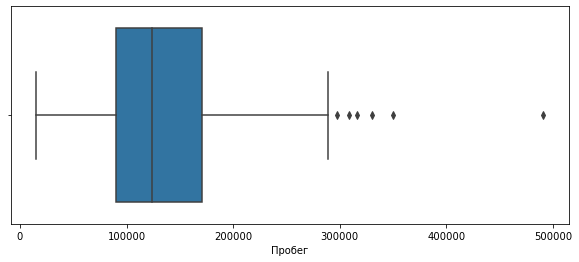

In [13]:
plt.figure(figsize=(10,4))
sns.boxplot(df['Пробег'])

In [14]:
# Найдем границы выбросов для Пробега
df_prob=df['Пробег']
df_prob=df_prob.sort_values()
print(df_prob)

# Межквартильный размах
iqr=(df_prob.quantile(q=0.75)-df_prob.quantile(q=0.25))*1.5
print("Межквартильный размах: ", iqr)

# Расчитываем границы выбросов
q1=df_prob.quantile(q=0.25)-iqr
print("Нижняя граница: ", q1)
q2=df_prob.quantile(q=0.75)+iqr
print("Верхняя граница: ", q2)

62      15046
201     30000
270     33500
282     36000
179     40000
        ...  
278    309000
290    316000
219    330000
212    350000
141    491000
Name: Пробег, Length: 300, dtype: int64
Межквартильный размах:  120458.625
Нижняя граница:  -30458.625
Верхняя граница:  290764.375


In [15]:
# Исключаем выброс
#df['Цена']=pd.to_numeric(df['Цена'])
#df['Пробег']=pd.to_numeric(df['Пробег'])

df = df.loc[(df['Цена'] > 362000) & (df['Цена'] < 1150000)]
df = df.loc[(df['Пробег'] > 15000) & (df['Пробег'] < 290000)]

print(df.count(axis=0))
df

Цена          288
Хр_возраст    288
Пробег        288
Кузов         288
Двигатель     288
Коробка       288
Цвет          288
Владельцы     288
dtype: int64


,Цена,Хр_возраст,Пробег,Кузов,Двигатель,Коробка,Цвет,Владельцы
0,860000,7,180981,седан,1.6,AT,белый,1
1,749000,8,113537,седан,1.6,MT,серый,3
2,745000,10,127639,хэтчбек,1.6,AT,фиолетовый,1
3,515000,10,225555,седан,1.4,MT,черный,4
4,675000,10,122000,седан,1.6,AT,черный,2
...,...,...,...,...,...,...,...,...
295,580000,10,155000,хэтчбек,1.6,MT,серый,2
296,770000,8,73000,седан,1.6,MT,серый,1
297,695000,9,168000,седан,1.4,AT,серый,3
298,690000,9,259000,седан,1.6,AT,черный,1


<AxesSubplot:xlabel='Цена'>

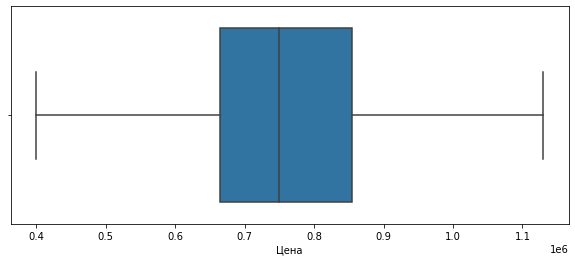

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(df['Цена'])

<AxesSubplot:xlabel='Пробег'>

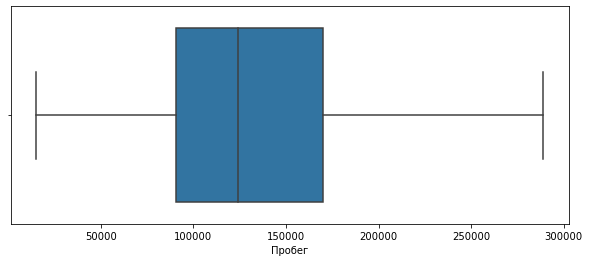

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(df['Пробег'])

<AxesSubplot:xlabel='Цена', ylabel='Density'>

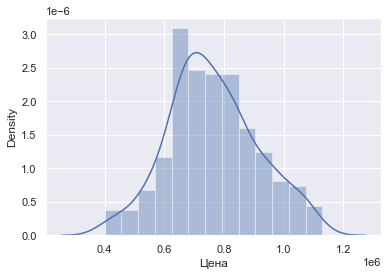

In [18]:
# Построим гистограмму распределения цены
sns.set()
sns.distplot(df['Цена'])

In [19]:
# Описательная статистика для цены
n=df['Цена'].count()
print("Объем выборки: ", n)
print("Минимальное значение: %.3f" % df['Цена'].min())
print("Максимальное значение: %.3f" % df['Цена'].max())
print("Среднее значение: %.3f" % df['Цена'].mean())
print("Медиана: %.3f" % df['Цена'].median())
print("Стандартное отклонение: %.3f" % df['Цена'].std())
print("Вариация: %.3f" % (df['Цена'].std() / df['Цена'].mean()))
print("Эксцесс: %.3f" % df['Цена'].kurt())
E=5*math.sqrt((24*n*(n-1)**2)/((n-3)*(n-2)*(n+3)*(n+5)))
print("Критический эксцесс: %.3f" % E)
print("Асимметрия: %.3f" % df['Цена'].skew())
A=3*math.sqrt((6*n*(n-1))/((n-2)*(n+1)*(n+3)))
print("Критическая асимметрия: %.3f" % A)

Объем выборки:  288
Минимальное значение: 400000.000
Максимальное значение: 1130000.000
Среднее значение: 762899.045
Медиана: 750000.000
Стандартное отклонение: 150220.655
Вариация: 0.197
Эксцесс: -0.225
Критический эксцесс: 1.431
Асимметрия: 0.183
Критическая асимметрия: 0.431


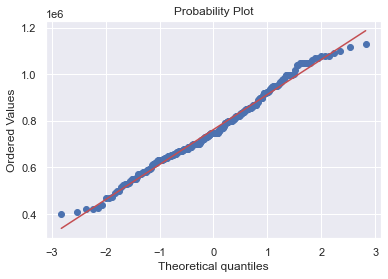

In [20]:
# График Q-Q plot
scipy.stats.probplot(df['Цена'], dist="norm", plot=pylab)
pylab.show()

In [21]:
# Критерий Колмогорова-Смирнова
stat, p=stats.kstest(df['Цена'],'norm')
alfa=0.05
print("p-level: %.5f" % p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, распределение ненормально")
else:
    print("H0 принимается, распределение нормально")

p-level: 0.00000
Статистика:  1.0
H0 отклоняется, распределение ненормально


In [22]:
# Критерий Шапиро-Уилка, Н0 - распределение нормальное, Н1 - распределение не нормальное. Н0 принимается если p>0.05,
# если p<0.05, то принимаем Н1. 
stat, p=scipy.stats.shapiro(df['Цена'])
alfa=0.05
print("p-level: %.5f" % p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, распределение ненормально")
else:
    print("H0 принимается, распределение нормально")

p-level: 0.02162
Статистика:  0.9884672164916992
H0 отклоняется, распределение ненормально


Согласно критерию Шапиро-Уилка распределение при значимости 0,05 ненормально, а при 0,01 - нормально.

In [23]:
# Критерий Пирсона
stat, p=scipy.stats.chisquare(df['Цена'])
alfa=0.05
print("p-level: %.5f" % p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, распределение ненормально")
else:
    print("H0 принимается, распределение нормально")

p-level: 0.00000
Статистика:  8489343.883217651
H0 отклоняется, распределение ненормально


In [24]:
# Критерий Жака-Бера
stat, p=scipy.stats.jarque_bera(df['Цена'])
alfa=0.05
print("p-level: %.5f" % p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, распределение ненормально")
else:
    print("H0 принимается, распределение нормально")

p-level: 0.31888
Статистика:  2.285865479923272
H0 принимается, распределение нормально


In [25]:
# Критерий Андерсона-Дарлинга
stat, p=sm.stats.normal_ad(df['Цена'])
alfa=0.05
print("p-level: %.5f" % p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, распределение ненормально")
else:
    print("H0 принимается, распределение нормально")

p-level: 0.00997
Статистика:  1.034553332135829
H0 отклоняется, распределение ненормально


<AxesSubplot:xlabel='Пробег', ylabel='Density'>

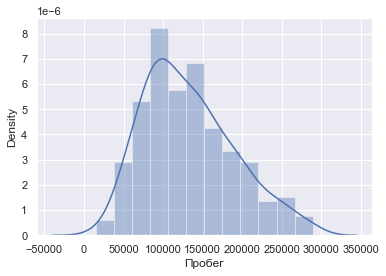

In [26]:
# Построим гистограмму распределения пробега
sns.set()
sns.distplot(df['Пробег'])

In [27]:
# Описательная статистика для пробега
n=df['Пробег'].count()
print("Объем выборки: ", n)
print("Минимальное значение: %.3f" % df['Пробег'].min())
print("Максимальное значение: %.3f" % df['Пробег'].max())
print("Среднее значение: %.3f" % df['Пробег'].mean())
print("Медиана: %.3f" % df['Пробег'].median())
print("Стандартное отклонение: %.3f" % df['Пробег'].std())
print("Вариация: %.3f" % (df['Пробег'].std() / df['Пробег'].mean()))
print("Эксцесс: %.3f" % df['Пробег'].kurt())
E=5*math.sqrt((24*n*(n-1)**2)/((n-3)*(n-2)*(n+3)*(n+5)))
print("Критический эксцесс: %.3f" % E)
print("Асимметрия: %.3f" % df['Пробег'].skew())
A=3*math.sqrt((6*n*(n-1))/((n-2)*(n+1)*(n+3)))
print("Критическая асимметрия: %.3f" % A)

Объем выборки:  288
Минимальное значение: 15046.000
Максимальное значение: 289000.000
Среднее значение: 132699.229
Медиана: 124000.000
Стандартное отклонение: 57202.113
Вариация: 0.431
Эксцесс: -0.221
Критический эксцесс: 1.431
Асимметрия: 0.582
Критическая асимметрия: 0.431


По пробегу наблюдается правосторонняя асимметрия, пробег не подчиняется нормальному закону распределения. Можно попробовать взять логорифм.

# Рассмотрим различные зависимости

In [28]:
df

,Цена,Хр_возраст,Пробег,Кузов,Двигатель,Коробка,Цвет,Владельцы
0,860000,7,180981,седан,1.6,AT,белый,1
1,749000,8,113537,седан,1.6,MT,серый,3
2,745000,10,127639,хэтчбек,1.6,AT,фиолетовый,1
3,515000,10,225555,седан,1.4,MT,черный,4
4,675000,10,122000,седан,1.6,AT,черный,2
...,...,...,...,...,...,...,...,...
295,580000,10,155000,хэтчбек,1.6,MT,серый,2
296,770000,8,73000,седан,1.6,MT,серый,1
297,695000,9,168000,седан,1.4,AT,серый,3
298,690000,9,259000,седан,1.6,AT,черный,1


In [29]:
# ТИП КУЗОВА
df['Кузов'].value_counts(sort = True, ascending = False)

седан      222
хэтчбек     66
Name: Кузов, dtype: int64

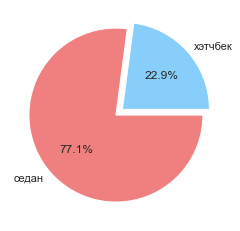

In [30]:
# Круговая диаграмма
fraction = df['Кузов'].value_counts()[1] / len(df['Кузов'])
labels = 'хэтчбек', 'седан'
sizes = [fraction, 1-fraction]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%')
plt.show()

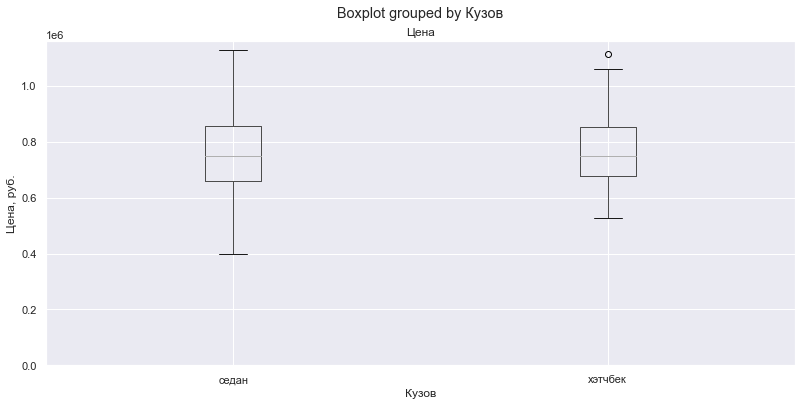

In [31]:
# Рассмотрим зависимость по кузову
df_kuz=df[['Цена', 'Кузов']] # берем 2 столбика с данными
fig, ax=plt.subplots(figsize=(13,6))
df_kuz.boxplot(column='Цена', by='Кузов', ax=ax)
ax.set_ylim(0,1160000)
plt.ylabel('Цена, руб.')
plt.show()

In [32]:
# Статистика Манна-Уитни
df_groups=df.groupby(by='Кузов')
g_1 = df_groups['Цена'].get_group('седан')
g_2 = df_groups['Цена'].get_group('хэтчбек')

stat, p=scipy.stats.mannwhitneyu(g_1, g_2)
alfa=0.05
print("p-level: ", p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, различие между ценами имеется")
else:
    print("H0 принимается, различия между ценами нет")

print("")
print("Среднее (седан): %.3f" % g_1.mean())
print("Среднее (хэтчбек): %.3f" % g_2.mean())

p-level:  0.5658812901557697
Статистика:  6984.5
H0 принимается, различия между ценами нет

Среднее (седан): 758858.356
Среднее (хэтчбек): 776490.455


In [33]:
# ОБЪЕМ ДВИГАТЕЛЯ
df['Двигатель'].value_counts(sort = True, ascending = False)

1.6    190
1.4     98
Name: Двигатель, dtype: int64

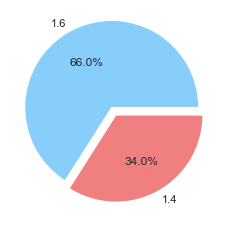

In [34]:
# Круговая диаграмма
fraction = df['Двигатель'].value_counts()[1.6] / len(df['Двигатель']) # 1.6 - объем двигателя
labels = '1.6', '1.4'
sizes = [fraction, 1-fraction]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%')
plt.show()

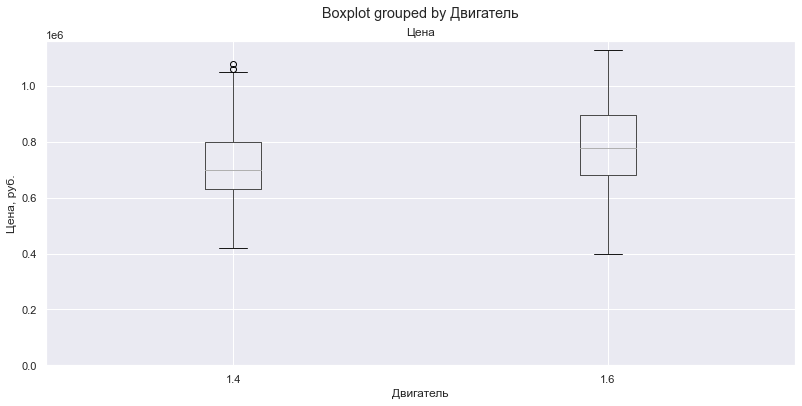

In [35]:
# Рассмотрим зависимость по двигателю
df_kuz=df[['Цена', 'Двигатель']] # берем 2 столбика с данными
fig, ax=plt.subplots(figsize=(13,6))
df_kuz.boxplot(column='Цена', by='Двигатель', ax=ax)
ax.set_ylim(0,1160000)
plt.ylabel('Цена, руб.')
plt.show()

In [36]:
# Статистика Манна-Уитни
df_groups=df.groupby(by='Двигатель')
g_1 = df_groups['Цена'].get_group(1.6)
g_2 = df_groups['Цена'].get_group(1.4)

stat, p=scipy.stats.mannwhitneyu(g_1, g_2)
alfa=0.05
print("p-level: ", p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, различие между ценами имеется")
else:
    print("H0 принимается, различия между ценами нет")

print("")
print("Среднее (1.6): %.3f" % g_1.mean())
print("Среднее (1.4): %.3f" % g_2.mean())

p-level:  2.4924997329871192e-05
Статистика:  12133.0
H0 отклоняется, различие между ценами имеется

Среднее (1.6): 789389.184
Среднее (1.4): 711540.612


In [37]:
# КОРОБКА ПЕРЕДАЧ
df['Коробка'].value_counts(sort = True, ascending = False)

AT    187
MT    101
Name: Коробка, dtype: int64

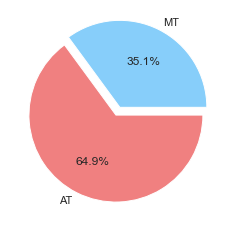

In [38]:
# Круговая диаграмма
fraction = df['Коробка'].value_counts()[1] / len(df['Коробка'])
labels = 'МТ', 'АТ'
sizes = [fraction, 1-fraction]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%')
plt.show()

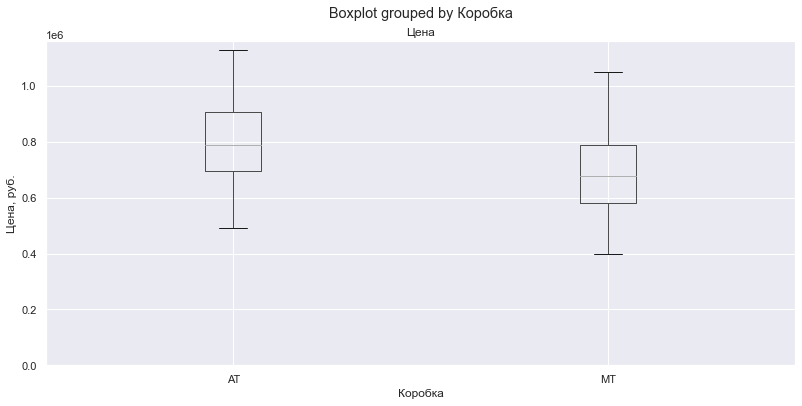

In [39]:
# Рассмотрим зависимость по коробке
df_kuz=df[['Цена', 'Коробка']] # берем 2 столбика с данными
fig, ax=plt.subplots(figsize=(13,6))
df_kuz.boxplot(column='Цена', by='Коробка', ax=ax)
ax.set_ylim(0,1160000)
plt.ylabel('Цена, руб.')
plt.show()

In [40]:
# Статистика Манна-Уитни
df_groups=df.groupby(by='Коробка')
g_1 = df_groups['Цена'].get_group('AT')
g_2 = df_groups['Цена'].get_group('MT')

stat, p=scipy.stats.mannwhitneyu(g_1, g_2)
alfa=0.05
print("p-level: ", p)
print("Статистика: ", stat)

if p < alfa:
    print("H0 отклоняется, различие между ценами имеется")
else:
    print("H0 принимается, различия между ценами нет")

print("")
print("Среднее (AT): %.3f" % g_1.mean())
print("Среднее (MT): %.3f" % g_2.mean())

p-level:  3.117469914327308e-10
Статистика:  13687.5
H0 отклоняется, различие между ценами имеется

Среднее (AT): 806054.305
Среднее (MT): 682997.723


In [41]:
# ЦВЕТ КУЗОВА
df['Цвет'].value_counts(sort = True, ascending = False)

белый          65
серый          52
черный         42
серебристый    40
красный        25
фиолетовый     19
бежевый        15
коричневый     14
синий          11
оранжевый       3
голубой         2
Name: Цвет, dtype: int64

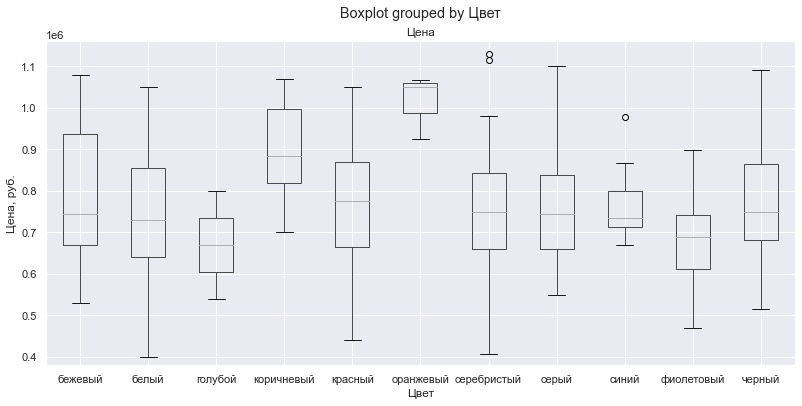

In [42]:
# Рассмотрим зависимость по цвету
df_kuz=df[['Цена', 'Цвет']] # берем 2 столбика с данными
fig, ax=plt.subplots(figsize=(13,6))
df_kuz.boxplot(column='Цена', by='Цвет', ax=ax)
ax.set_ylim(380000,1160000)
plt.ylabel('Цена, руб.')
plt.show()

In [43]:
# Средние значения по всем признакам
df_groups=df.groupby(by='Цвет')
print("Среднее (белый): %.0f" % df_groups['Цена'].get_group('белый').mean())
print("Среднее (серый): %.0f" % df_groups['Цена'].get_group('серый').mean())
print("Среднее (черный): %.0f" % df_groups['Цена'].get_group('черный').mean())
print("Среднее (серебристый): %.0f" % df_groups['Цена'].get_group('серебристый').mean())
print("Среднее (красный): %.0f" % df_groups['Цена'].get_group('красный').mean())
print("Среднее (фиолетовый): %.0f" % df_groups['Цена'].get_group('фиолетовый').mean())
print("Среднее (бежевый): %.0f" % df_groups['Цена'].get_group('бежевый').mean())
print("Среднее (коричневый): %.0f" % df_groups['Цена'].get_group('коричневый').mean())
print("Среднее (синий): %.0f" % df_groups['Цена'].get_group('синий').mean())
print("Среднее (оранжевый): %.0f" % df_groups['Цена'].get_group('оранжевый').mean())
print("Среднее (голубой): %.0f" % df_groups['Цена'].get_group('голубой').mean())

df_price = round(df.groupby(by=['Цвет'],as_index=False)['Цена'].mean(), 0)
df_price.sort_values("Цена")

Среднее (белый): 734616
Среднее (серый): 762738
Среднее (черный): 776359
Среднее (серебристый): 755276
Среднее (красный): 773840
Среднее (фиолетовый): 677608
Среднее (бежевый): 787400
Среднее (коричневый): 902786
Среднее (синий): 766545
Среднее (оранжевый): 1014333
Среднее (голубой): 669400


,Цвет,Цена
2,голубой,669400.0
9,фиолетовый,677608.0
1,белый,734616.0
6,серебристый,755276.0
7,серый,762738.0
8,синий,766545.0
4,красный,773840.0
10,черный,776359.0
0,бежевый,787400.0
3,коричневый,902786.0


По цветам кузова с многочисленной выборкой (черный, белый, серый и серебристый - 199 ТС) средние цены равны. Также с ними сопоставимы цены по таким цветам, как бежевый и синий. Итого выборка в 226 ТС.

In [44]:
# КОЛИЧЕСТВО ВЛАДЕЛЬЦЕВ
df['Владельцы'].value_counts(sort = True, ascending = False)

1    122
2     93
3     41
4     21
5      9
6      1
7      1
Name: Владельцы, dtype: int64

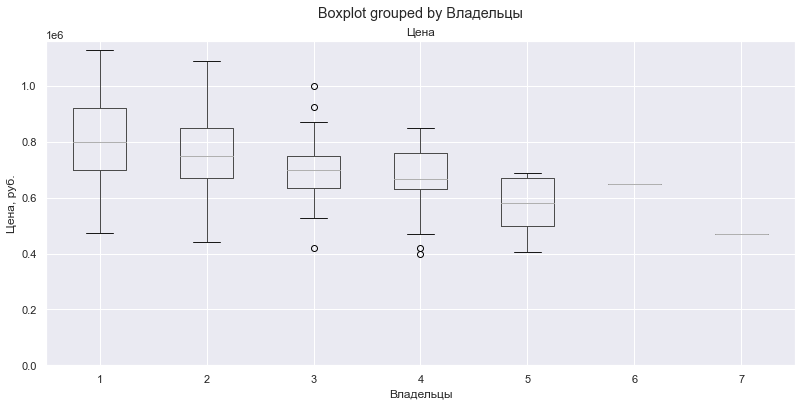

In [45]:
# Рассмотрим зависимость по владельцам
df_kuz=df[['Цена', 'Владельцы']] # берем 2 столбика с данными
fig, ax=plt.subplots(figsize=(13,6))
df_kuz.boxplot(column='Цена', by='Владельцы', ax=ax)
ax.set_ylim(0,1160000)
plt.ylabel('Цена, руб.')
plt.show()

In [46]:
# Оставляем группы - 1 и 2 владельцев, а все остальное объединяем в группу 3 и более
#df=df.drop('Владельцы_2', axis=1)
df_vlad = df['Владельцы'].map({1 : '1', 2 : '2', 3 : '3 и более', 4 : '3 и более', 5 : '3 и более', 
                               6 : '3 и более', 7 : '3 и более'})
df.insert(8, "Владельцы_2", df_vlad)
df

,Цена,Хр_возраст,Пробег,Кузов,Двигатель,Коробка,Цвет,Владельцы,Владельцы_2
0,860000,7,180981,седан,1.6,AT,белый,1,1
1,749000,8,113537,седан,1.6,MT,серый,3,3 и более
2,745000,10,127639,хэтчбек,1.6,AT,фиолетовый,1,1
3,515000,10,225555,седан,1.4,MT,черный,4,3 и более
4,675000,10,122000,седан,1.6,AT,черный,2,2
...,...,...,...,...,...,...,...,...,...
295,580000,10,155000,хэтчбек,1.6,MT,серый,2,2
296,770000,8,73000,седан,1.6,MT,серый,1,1
297,695000,9,168000,седан,1.4,AT,серый,3,3 и более
298,690000,9,259000,седан,1.6,AT,черный,1,1


In [47]:
df['Владельцы_2'].value_counts(sort = True, ascending = False)

1            122
2             93
3 и более     73
Name: Владельцы_2, dtype: int64

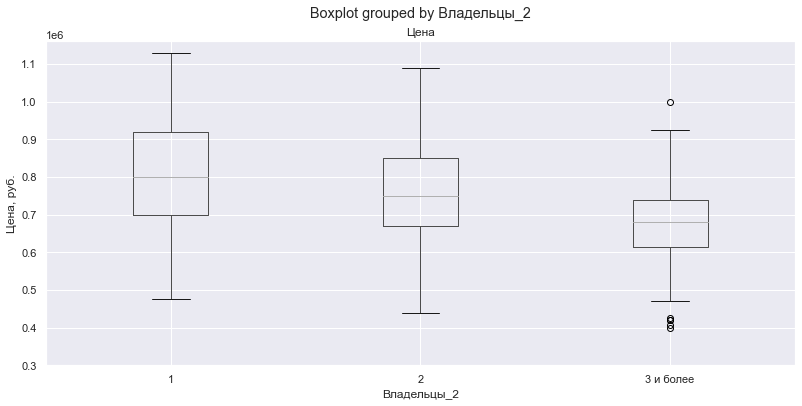

In [48]:
# Рассмотрим зависимость по владельцам_2
df_kuz=df[['Цена', 'Владельцы_2']] # берем 2 столбика с данными
fig, ax=plt.subplots(figsize=(13,6))
df_kuz.boxplot(column='Цена', by='Владельцы_2', ax=ax)
ax.set_ylim(300000,1160000)
plt.ylabel('Цена, руб.')
plt.show()

In [49]:
# Статистика Крускала-Уолиса
df_groups=df.groupby(by='Владельцы_2')
g_1 = df_groups['Цена'].get_group('1')
g_2 = df_groups['Цена'].get_group('2')
g_3 = df_groups['Цена'].get_group('3 и более')

stat, p=scipy.stats.kruskal(g_1, g_2, g_3)
alfa=0.05
print("p-level: %.3f" % p)
print("Статистика: %.3f" % stat)

if p < alfa:
    print("H0 отклоняется, различие между ценами имеется")
else:
    print("H0 принимается, различия между ценами нет")

print("")
print("Среднее (1): %.3f" % g_1.mean())
print("Среднее (2): %.3f" % g_2.mean())
print("Среднее (3 и более): %.3f" % g_3.mean())

p-level: 0.000
Статистика: 40.286
H0 отклоняется, различие между ценами имеется

Среднее (1): 816174.262
Среднее (2): 764603.065
Среднее (3 и более): 671692.877


In [50]:
# Преобразуем факторы в количественный вид с использованием шкалы 0 и 1
# Кузов: 0 - хэтчбек, 1 - седан.
# Коробка: 1 - AT (автомат), 0 - MT (механика).
# Цвет удаляем
df['Кузов'] = df['Кузов'].map({'седан': 1, 'хэтчбек': 0})
df['Коробка'] = df['Коробка'].map({'AT': 1, 'MT': 0})
df=df.drop('Цвет', axis=1)
df

,Цена,Хр_возраст,Пробег,Кузов,Двигатель,Коробка,Владельцы,Владельцы_2
0,860000,7,180981,1,1.6,1,1,1
1,749000,8,113537,1,1.6,0,3,3 и более
2,745000,10,127639,0,1.6,1,1,1
3,515000,10,225555,1,1.4,0,4,3 и более
4,675000,10,122000,1,1.6,1,2,2
...,...,...,...,...,...,...,...,...
295,580000,10,155000,0,1.6,0,2,2
296,770000,8,73000,1,1.6,0,1,1
297,695000,9,168000,1,1.4,1,3,3 и более
298,690000,9,259000,1,1.6,1,1,1


                Цена  Хр_возраст    Пробег     Кузов  Двигатель   Коробка  \
Цена        1.000000   -0.633680 -0.640242 -0.033939   0.248876  0.371497   
Хр_возраст -0.633680    1.000000  0.267310 -0.133203  -0.048096 -0.095777   
Пробег     -0.640242    0.267310  1.000000  0.110698  -0.047776 -0.116318   
Кузов      -0.033939   -0.133203  0.110698  1.000000   0.009445 -0.106400   
Двигатель   0.248876   -0.048096 -0.047776  0.009445   1.000000  0.101850   
Коробка     0.371497   -0.095777 -0.116318 -0.106400   0.101850  1.000000   
Владельцы  -0.375914    0.158577  0.278811  0.032338  -0.103327  0.004646   

            Владельцы  
Цена        -0.375914  
Хр_возраст   0.158577  
Пробег       0.278811  
Кузов        0.032338  
Двигатель   -0.103327  
Коробка      0.004646  
Владельцы    1.000000  


<AxesSubplot:>

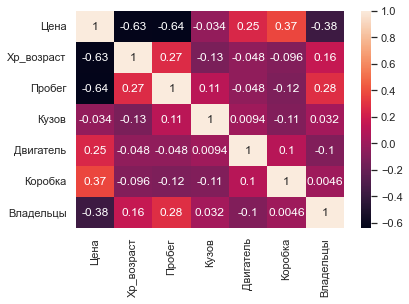

In [51]:
# Строим корреляционную матрицу
# h_map(df,0.3) # аналогичная матрица, как ниже
numeric_col = ['Цена','Хр_возраст','Пробег','Кузов','Двигатель', 'Коробка', 'Владельцы']
corr_matrix = df.loc[:,numeric_col].corr(method="spearman") # pearson, kendall
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)

По корреляционной матрице мы видим, что имеется зависимость цены от хронологического возраста, пробега, количества владельцев, типа коробки передач, объема двигателя. Тип кузова на стоимость транспортного средства не влияет. Мультиколлинеарность не наблюдается, ниже проведем проверку по методу VIF.

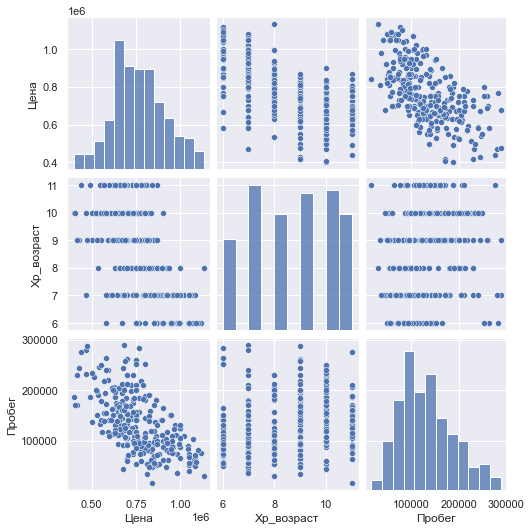

In [52]:
# Построим графики разбросов и гистограммы в зависимости от факторов - пробег и хронологический возраст
# df.columns # выводит названия столбцов
# scatter_matrix(df[['Цена','Хр_возраст','Пробег']]) # выводит аналогичный грайик, как ниже
sns.pairplot(df[['Цена','Хр_возраст','Пробег']])

In [53]:
# Преобразуем цену ТС и пробег в логарифм и посмотрим результаты
df_price = df['Цена'].apply(np.log)
df.insert(1, "LN(Цена)", df_price)

In [54]:
# df=df.drop('LN(Пробег)', axis=1)
df_prob = df['Пробег'].apply(np.log)
df.insert(4, "LN(Пробег)", df_prob)

df.head(10)

,Цена,LN(Цена),Хр_возраст,Пробег,LN(Пробег),Кузов,Двигатель,Коробка,Владельцы,Владельцы_2
0,860000,13.664688,7,180981,12.106147,1,1.6,1,1,1
1,749000,13.526494,8,113537,11.639884,1,1.6,0,3,3 и более
2,745000,13.521139,10,127639,11.756961,0,1.6,1,1,1
3,515000,13.151922,10,225555,12.326319,1,1.4,0,4,3 и более
4,675000,13.422468,10,122000,11.711776,1,1.6,1,2,2
5,725000,13.493927,11,124500,11.732061,1,1.6,1,4,3 и более
6,795000,13.586097,9,106593,11.576773,1,1.4,1,1,1
7,770000,13.554146,8,83000,11.326596,1,1.6,1,1,1
8,670000,13.415033,10,196000,12.185870,1,1.4,1,1,1
9,720000,13.487006,10,150362,11.920801,1,1.6,1,2,2


<AxesSubplot:xlabel='LN(Цена)', ylabel='Density'>

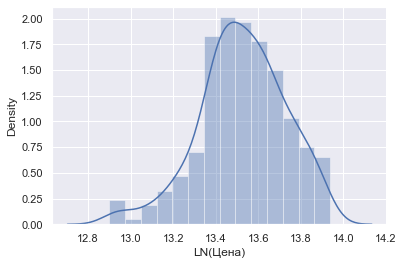

In [55]:
# Построим гистограмму распределения логарифмированной цены
sns.set()
sns.distplot(df['LN(Цена)'])

<AxesSubplot:xlabel='LN(Пробег)', ylabel='Density'>

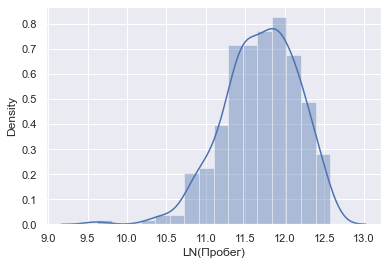

In [56]:
# Построим гистограмму распределения логарифмированного пробега
sns.set()
sns.distplot(df['LN(Пробег)'])

In [57]:
print("Эксцесс: %.3f" % df['LN(Пробег)'].kurt())
E=5*math.sqrt((24*n*(n-1)**2)/((n-3)*(n-2)*(n+3)*(n+5)))
print("Критический эксцесс: %.3f" % E)
print("Асимметрия: %.3f" % df['LN(Пробег)'].skew())
A=3*math.sqrt((6*n*(n-1))/((n-2)*(n+1)*(n+3)))
print("Критическая асимметрия: %.3f" % A)

Эксцесс: 0.775
Критический эксцесс: 1.431
Асимметрия: -0.581
Критическая асимметрия: 0.431


# Проверка на мультиколлинеарность по методу VIF

In [58]:
X=pd.DataFrame(df[['Хр_возраст','Пробег','Двигатель', 'Коробка', 'Владельцы']])
Factors = sm.add_constant(X) # добавляем константу = 1 к факторам
Factors

,const,Хр_возраст,Пробег,Двигатель,Коробка,Владельцы
0,1.0,7,180981,1.6,1,1
1,1.0,8,113537,1.6,0,3
2,1.0,10,127639,1.6,1,1
3,1.0,10,225555,1.4,0,4
4,1.0,10,122000,1.6,1,2
...,...,...,...,...,...,...
295,1.0,10,155000,1.6,0,2
296,1.0,8,73000,1.6,0,1
297,1.0,9,168000,1.4,1,3
298,1.0,9,259000,1.6,1,1


In [59]:
vif = [variance_inflation_factor(exog=Factors.values, 
                                 exog_idx=i) for i in range(Factors.shape[1])]
pd.DataFrame({'Фактор': Factors.columns, 'VIF': np.around(vif, 2)})

,Фактор,VIF
0,const,311.32
1,Хр_возраст,1.05
2,Пробег,1.14
3,Двигатель,1.03
4,Коробка,1.03
5,Владельцы,1.11


Согласно методу VIF мультиколлинеарность отсутствует (так как VIF<10), все факторы могут быть использованы в модели регрессии.

# Построение многофакторной регрессионной модели

In [98]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
X=df[['Хр_возраст','Пробег','Двигатель', 'Коробка', 'Владельцы']]
Y=df['Цена']
# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     148.0
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           6.17e-69
Time:                        06:47:35   Log-Likelihood:                -2897.5
No. Observations:                 230   AIC:                             5807.
Df Residuals:                     224   BIC:                             5828.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.711e+05   8.35e+04     11.635      0.0

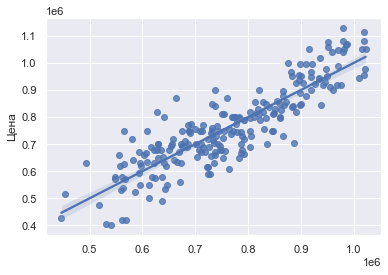

In [61]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
r = results.predict(X)
r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

BIC - информационный критерий. Похож на AIC, но имеет более высокий штраф для моделей с большим количеством параметров. Чем меньше значение, тем лучше.

Omnibus - тест на асимметрию и эксцесс остатков. Мы надеемся увидеть значение, близкое к нулю, которое указывало бы на нормальность. The Prob (Omnibus) выполняет статистический тест, показывающий вероятность того, что остатки нормально распределены. Мы надеемся увидеть здесь что-то близкое к 1. В случае если Omnibus относительно низок, а Prob (Omnibus) относительно высок, остатки в целом нормальны, но не идеальны. Подход с линейной регрессией, вероятно, будет лучше, чем случайное угадывание, но, вероятно, хуже нелинейных подходов.

Skew - мера симметрии данных. Мы хотим видеть что-то близкое к нулю, это указывает на то, что остаточное распределение нормально.

Kurtosis - это мера «пиковости» или кривизны данных. Более высокие пики приводят к большему куртозу. Большой куртоз можно интерпретировать как более плотную кластеризацию остатков около нуля, что подразумевает лучшую модель с небольшим количеством выбросов (т.е. чем больше, тем лучше).

Cond. No. - значения больше 20 вызывают подозрения в мультиколлинеарности. Чаще всего сложно пройти данный тест. Чем меньше, тем лучше.

R2 - насколько переменные хорошо объясняют разброс оценок. Максимальное значение – 1. Но при значениях более 0,9 надо крайне внимательно проверить на эффект мультиколлинеарности. Adj. R-squared - это нормированный R2, который используется для сравнения моделей регрессии (как AIC и BIC).

Durbin-Watson - тест на наличие автокорреляции в остатках. В идеале значение должно стремиться к 2 (минимальное значение – 0, максимальное – 4). Значения меньше 0,8 однозначно указывают на циклические колебания в остатках. Эмпирически считается, что статистика лежит в нормальных пределах, если больше 1,5 и меньше 2,5.

Jarque-Bera (JB) - тест на нормальность остатков. Используется на больших наборах данных, более 2000. По своей сути аналогичен Omnibus. Если Prob(JB)>0.05, то считается, что остатки распределены нормально.

In [62]:
# Тестирование полученной модели на тестовых данных
model2 = LinearRegression()
model2.fit(X_train, Y_train)

# R2 обучающей выборки
print('Trainig R^2:', round(results.rsquared, 4))
# print('Trainig R^2::', model2.score(X_train, Y_train))

# R2 тестовой выборки
print('Test R^2:', round(model2.score(X_test, Y_test), 4))

Trainig R^2: 0.7677
Test R^2: 0.8299


In [63]:
# Выведим все полученные коэффициенты
# pd.DataFrame({'Коэфф': results.params, 'p-level': round(results.pvalues, 3)})
# pd.DataFrame({'Коэфф': results.params})
coef=pd.DataFrame({'Коэфф': results.params})
coef

,Коэфф
const,971141.456252
Хр_возраст,-45265.418266
Пробег,-1.129242
Двигатель,221872.238943
Коробка,80268.227998
Владельцы,-30224.069413


<BarContainer object of 5 artists>

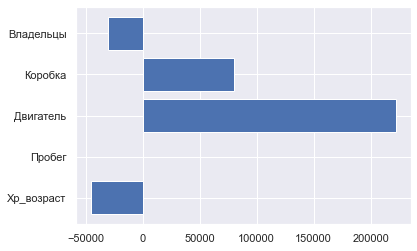

In [64]:
# Ниже приведены примеры вывода весо каждого фактора для других моделей, не подходит для регрессии. 
# Вклад для регрессии показывают сами коэффициенты модели
#v=model2.feature_importances_
#print(model.feature_importances_)
#feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':model2.feature_importances_})
#feature_importance.sort_values('feature_importance',ascending=False)

# Покажем вклад каждого коэффициента графически
%config inlineBackend.figure_format = 'svg'
%matplotlib inline
plt.barh(X_train.columns, model2.coef_.flatten())

In [72]:
# Построим график моделей
# Проведем расчет цены ТС по полученной модели и поместим результат в df
X_all=df[['Хр_возраст','Пробег','Двигатель', 'Коробка', 'Владельцы']] # все предикторы
y_pred = model2.predict(X_all)
y_pred = pd.DataFrame(y_pred)
y_pred=y_pred.rename({0: 'Цена_рег'}, axis='columns')
y_pred=round(y_pred, 0)
y_pred

# df_reg = [coef['Коэфф'].values[0]+coef['Коэфф'].values[1]*df['Хр_возраст']+coef['Коэфф'].values[2]*df['Пробег']+
#           coef['Коэфф'].values[3]*df['Двигатель']+coef['Коэфф'].values[4]*df['Коробка']+
#           coef['Коэфф'].values[5]*df['Владельцы']] # модет быть и такая запись

,Цена_рег
0,854952.0
1,745131.0
2,779392.0
3,453506.0
4,755535.0
...,...
283,638002.0
284,851355.0
285,674257.0
286,676319.0


In [73]:
df2

,Цена
0,860000
1,749000
2,745000
3,515000
4,675000
...,...
295,580000
296,770000
297,695000
298,690000


In [74]:
df2=df2.reset_index()
df2=df2.drop('index', axis=1)
df2

,Цена
0,860000
1,749000
2,745000
3,515000
4,675000
...,...
283,580000
284,770000
285,695000
286,690000


In [75]:
# Создадим df3 и поместим в него значение имеющихся на рынке ТС цен и предсказанных цен по модели
#df2=pd.DataFrame(df['Цена'])
df3 = pd.concat([df2, y_pred], ignore_index=True, axis=1)
df3

,0,1
0,860000,854952.0
1,749000,745131.0
2,745000,779392.0
3,515000,453506.0
4,675000,755535.0
...,...,...
283,580000,638002.0
284,770000,851355.0
285,695000,674257.0
286,690000,676319.0


In [77]:
df3=df3.rename({0: 'Цена', 1: 'Цена_рег'}, axis='columns')

In [78]:
# добавим в df3 остатки
# df3.insert(2, "Остатки", results.resid) # это остатки по обучающей выборке, поэтому так не получится
# df3=df3.drop(['Остатки', 0], axis=1)
resid = df3['Цена'] - df3['Цена_рег']
df3.insert(2, "Остатки", resid)
df3

,Цена,Цена_рег,Остатки
0,860000,854952.0,5048.0
1,749000,745131.0,3869.0
2,745000,779392.0,-34392.0
3,515000,453506.0,61494.0
4,675000,755535.0,-80535.0
...,...,...,...
283,580000,638002.0,-58002.0
284,770000,851355.0,-81355.0
285,695000,674257.0,20743.0
286,690000,676319.0,13681.0


In [79]:
# рассчитаем относительный остатки
resid_ot = df3['Остатки']/df3['Цена']
df3.insert(3, "Остатки_от", resid_ot)
df3

,Цена,Цена_рег,Остатки,Остатки_от
0,860000,854952.0,5048.0,0.005870
1,749000,745131.0,3869.0,0.005166
2,745000,779392.0,-34392.0,-0.046164
3,515000,453506.0,61494.0,0.119406
4,675000,755535.0,-80535.0,-0.119311
...,...,...,...,...
283,580000,638002.0,-58002.0,-0.100003
284,770000,851355.0,-81355.0,-0.105656
285,695000,674257.0,20743.0,0.029846
286,690000,676319.0,13681.0,0.019828


In [80]:
# рассчитаем среднюю ошибку аппроксимации
err_mean = (df3['Остатки_от'].sum()/df3['Остатки_от'].count())*100
err_max = df3['Остатки_от'].max()*100

print("Средняя ошибка: %.1f" % err_mean)
print("Максимальная ошибка: %.1f" % err_max)
print("------------------------------")
print("Ошибки для полученной модели:")
print("MSE: %.1f" % round(results.mse_resid, 3))
print("RMSE: %.1f" % round(np.sqrt(results.mse_resid), 3))
print("MAE: %.1f" % round(abs(df3['Остатки']).sum()/df3['Остатки'].count(), 3))
#print('MAE:', metrics.mean_absolute_error(y, x))

Средняя ошибка: -1.0
Максимальная ошибка: 24.6
------------------------------
Ошибки для полученной модели:
MSE: 5264820802.0
RMSE: 72559.1
MAE: -1431.6


<function matplotlib.pyplot.show(close=None, block=None)>

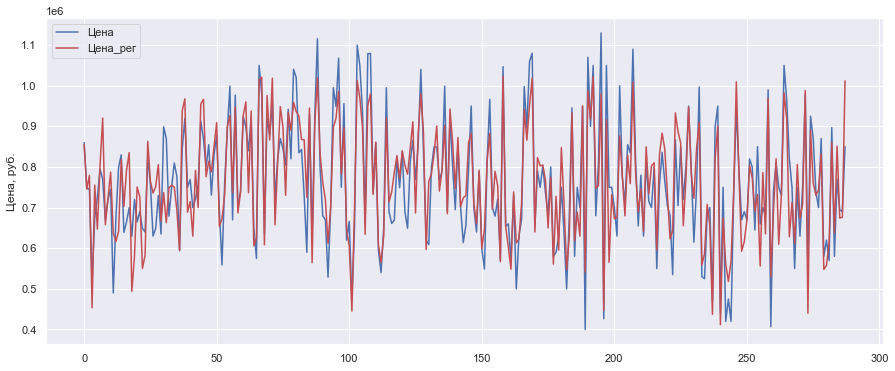

In [81]:
# График
fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.plot(df3['Цена'], c='b', label="Цена") # цена
ax.plot(df3['Цена_рег'], c='r', label="Цена_рег") # прогноз цены по модели регрессии
plt.ylabel('Цена, руб.')
ax.legend(loc=2);
plt.show

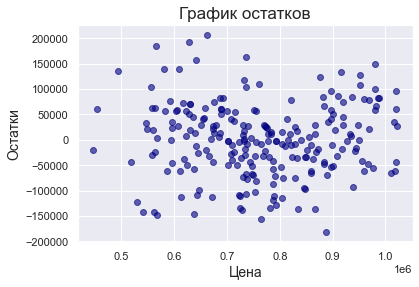

In [82]:
# Строим график остатков обучающей выборки
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Остатки', fontsize=14)
plt.title('График остатков', fontsize=17)
plt.show()

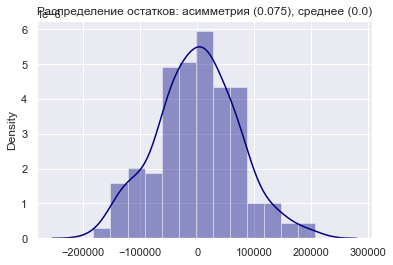

In [83]:
# Строим гистограмму распределения остатков обучающей выборки
resid_mean=round(results.resid.mean(), 3)
resid_skew=round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Распределение остатков: асимметрия ({resid_skew}), среднее ({resid_mean})', fontsize=12)
plt.show()

In [90]:
df_y

,Цена
46,800000
267,990000
223,799000
170,1060000
232,705000
...,...
260,820000
198,1050000
118,669000
47,855000


In [91]:
X_train

,Цена,Хр_возраст,Пробег,Двигатель,Коробка,Владельцы
46,800000,9,144072,1.6,1,2
267,990000,6,93000,1.6,1,2
223,799000,8,180311,1.6,1,1
170,1060000,7,55655,1.4,1,1
232,705000,9,72000,1.6,1,1
...,...,...,...,...,...,...
260,820000,9,48000,1.6,0,2
198,1050000,6,72580,1.6,1,1
118,669000,6,144182,1.4,0,2
47,855000,9,137177,1.6,1,1


In [92]:
df_y=pd.DataFrame(Y_train)
df_test = X_train
#df_test = df_test.insert(0, "Цена", df_y)
df_test

,Цена,Хр_возраст,Пробег,Двигатель,Коробка,Владельцы
46,800000,9,144072,1.6,1,2
267,990000,6,93000,1.6,1,2
223,799000,8,180311,1.6,1,1
170,1060000,7,55655,1.4,1,1
232,705000,9,72000,1.6,1,1
...,...,...,...,...,...,...
260,820000,9,48000,1.6,0,2
198,1050000,6,72580,1.6,1,1
118,669000,6,144182,1.4,0,2
47,855000,9,137177,1.6,1,1


In [93]:
# Выполним подбор регрессоров, при которых будут минимальная мультиколлинеарность и высокая точность
col=['Хр_возраст','Пробег','Двигатель', 'Коробка', 'Владельцы']
res=get_factors(df_test, Y_train, col)

Количество комбинаций  32
Результаты перебора в порядке возрастания MSE:
             MSE        r2                                         Переменные
0   5.127478e+09  0.767671  [Пробег, Двигатель, Коробка, Владельцы, Хр_воз...
1   5.559808e+09  0.748081    [Владельцы, Коробка, Хр_возраст, Пробег, const]
2   6.149208e+09  0.721375    [Коробка, Хр_возраст, Пробег, Двигатель, const]
3   6.561062e+09  0.702714  [Владельцы, Хр_возраст, Пробег, Двигатель, const]
4   6.782217e+09  0.692693               [Коробка, Хр_возраст, Пробег, const]
5   7.081536e+09  0.679131             [Владельцы, Хр_возраст, Пробег, const]
6   7.614600e+09  0.654977             [Хр_возраст, Пробег, Двигатель, const]
7   8.359604e+09  0.621221                        [Хр_возраст, Пробег, const]
8   9.001836e+09  0.592121  [Владельцы, Коробка, Хр_возраст, Двигатель, co...
9   9.406617e+09  0.573780            [Владельцы, Коробка, Хр_возраст, const]
10  1.022404e+10  0.536742     [Владельцы, Коробка, Пробег, Двигатель

In [272]:
# Выведем список регрессоров лучшей модели
res.loc[0][2] # первый индекс [0] - это строка, второй [2] - это столбец.

['Двигатель', 'Коробка', 'Хр_возраст', 'Владельцы', 'Пробег', 'const']

Проводить дальнейшие исследования лучшей модели нецелесообразно, так как они проведены выше. Мы изначально построили качественную модель по всем факторам (двигатель, коробка, хронологический возраст, владельцы, пробег).
Если мы первоначально построили не совсем качественную модель регрессии, то в этом случае проводим анализ и интерпритацию лучшей модели из вышепредложенных.
Наша полученная регрессионная модель имеет следующий вид:

<font size = 2><div style="text-align: justify">**Цена = (971141.456 - 45265.418 х Хр_возраст - 1,129 х Пробег + 221872.239 х Двигатель + 80268.228 х Коробка - 30224.069 х Владельцы) х Торг**</div></font>

# Интервал

In [94]:
# Предскажем стоимость ТС с данными: Хр_возраст = 6 лет, Пробег = 73 000, Двигатель = 1.4, Кробка = 1, Владельцы = 3
coeff=pd.DataFrame({'Коэфф': results.params})
Param=pd.DataFrame({'Параметры': [1,6,73000,1.4,1,3]}, index=['const', 'Хр_возраст', 'Пробег', 'Двигатель', 
                                                              'Коробка', 'Владельцы'])
df4 = pd.concat([coeff, Param], axis=1)
df4

,Коэфф,Параметры
const,971141.456252,1.0
Хр_возраст,-45265.418266,6.0
Пробег,-1.129242,73000.0
Двигатель,221872.238943,1.4
Коробка,80268.227998,1.0
Владельцы,-30224.069413,3.0


In [95]:
Price = (df4['Коэфф']*df4['Параметры']).sum()
print("Прогнозная цена ТС: %.0f" % Price)

Прогнозная цена ТС: 917331


In [96]:
# Рассчитаем интервалы
import locale
locale.setlocale(locale.LC_ALL, '')

mse = round(results.mse_resid, 3)
Two_SKO = 2*np.sqrt(mse)

upper_bound = Price + Two_SKO
lower_bound = Price - Two_SKO
print("Прогнозная цена ТС:", locale.format('%d', Price, grouping=True))
print("Верхняя граница цены:", locale.format('%d', upper_bound, grouping=True))
print("Нижняя граница цены:", locale.format('%d', lower_bound, grouping=True))

Прогнозная цена ТС: 917 331
Верхняя граница цены: 1 062 449
Нижняя граница цены: 772 213


С вероятностью 95% цена транспортного средства попадет в наш расчитанный интервал.

In [ ]:
# Построим и интерпретируем лучшую модель
# Y=df['Рабочий парк']
# df=sm.add_constant(df)
#укажем пермеенные, которые будем использовать в качестве регрессоров
# X=df[['Следование резервом', 'Грузооборот', 'Участковая скорость', 'const']]
# reg = sm.OLS(Y, X)
# res=reg.fit()
# print(res.summary())
# sns.regplot(res.fittedvalues.copy(), Y)
# plt.show()

# Кросс-валидация

Когда мы делим выборку на обучающую и тестовую, то мы делаем это один раз и мы просто можем попасть в хорошую модель. Кросс-валидация позволяет посмотреть метрику R2 (качество модели) при разных разделениях выборки. Например, внизу мы делим выборку на 5 разных частей, то есть обучаем нашу модель на 5 разных выборках и смотрим ее качество. Это необходимо делать для подстраховки, чтобы понимать среднее качество модели.

In [142]:
# кросс-валидация
from sklearn.model_selection import cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model2 = LinearRegression()

cv_results = cross_val_score(model2, X_train, Y_train, cv=5)
cv_results

array([0.77400995, 0.67378448, 0.74191915, 0.70534877, 0.7831194 ])

In [149]:
# среднее значение качества модели
cv_results.mean()

0.7356363518573756

# Регуляризация (Ridge (L2) и Lasso (L1) регрессии)

Регуляризация решает 2 проблемы: мультиколлинеарность признаков и неинформативность признаков.

In [185]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)

# R2 обучающей выборки
print('Trainig R^2:', round(results.rsquared, 4))
# print('Trainig R^2::', model2.score(X_train, Y_train))

# R2 тестовой выборки
print('Test R^2:', round(model2.score(X_test, Y_test), 4))

# MSE
Y_test_pred = model2.predict(X_test)
print("Test MSE", mean_squared_error(Y_test, Y_test_pred))

Trainig R^2: 0.7677
Test R^2: 0.8299
Test MSE 4100277146.187262


In [183]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=2.5, max_iter = 100, tol = 0.1)
lasso_reg.fit(X_train, Y_train)

# R2 обучающей выборки
print('Trainig R^2:', round(lasso_reg.score(X_train, Y_train), 4))
# print('Trainig R^2::', model2.score(X_train, Y_train))

# R2 тестовой выборки
print('Test R^2:', round(lasso_reg.score(X_test, Y_test), 4))

# MSE
Y_test_pred = lasso_reg.predict(X_test)
print("Test MSE", mean_squared_error(Y_test, Y_test_pred))

Trainig R^2: 0.7677
Test R^2: 0.83
Test MSE 4100236724.348506


In [184]:
from sklearn import linear_model

Ridge_reg = linear_model.Ridge(alpha=0.01, max_iter = 100, tol = 0.1)
Ridge_reg.fit(X_train, Y_train)

# R2 обучающей выборки
print('Trainig R^2:', round(Ridge_reg.score(X_train, Y_train), 4))
# print('Trainig R^2::', model2.score(X_train, Y_train))

# R2 тестовой выборки
print('Test R^2:', round(Ridge_reg.score(X_test, Y_test), 4))

# MSE
Y_test_pred = Ridge_reg.predict(X_test)
print("Test MSE", mean_squared_error(Y_test, Y_test_pred))

Trainig R^2: 0.7677
Test R^2: 0.83
Test MSE 4100234324.2279525


Как видно выше, наилучшего результат по метрике R2 можно добиться при alpha > 2.5 в Lasso регрессии или alpha = 0.1 в Ridge регрессии. В целом результат, полученный по многовакторной модели регрессии 0,8299 не сильно уступает регуляризации - 0,83.

<font size = 3><div style="text-align: justify">**Другой подход к регуляризации:**</div></font>

In [176]:
# Реализуем модель Lasso
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X, Y, test_size=0.2, random_state=0)

scaler_x = StandardScaler()
X_train_r = scaler_x.fit_transform(X_train_r)
X_test_r = scaler_x.transform(X_test_r)

scaler_y = StandardScaler()
Y_train_r = scaler_y.fit_transform(Y_train_r.values.reshape((-1,1))).reshape(-1)
Y_test_r = scaler_y.transform(Y_test_r.values.reshape((-1,1))).reshape(-1)

model = Lasso(alpha=0.04) # альфу можно изменять и смотреть как меняются R2
        # в место Lasso можно написать Ridge или ElasticNet
model.fit(X_train_r, Y_train_r)


Y_train_predicted = model.predict(X_train_r)
Y_test_predicted = model.predict(X_test_r)

print("Train R-squared", r2_score(Y_train_r, Y_train_predicted))
print("Test R-squared", r2_score(Y_test_r, Y_test_predicted))
print("Test MSE", mean_squared_error(Y_test_r, Y_test_predicted))
#mean_squared_error(y_test,y_pred)

Train R-squared 0.7617940200334193
Test R-squared 0.8367263779597377
Test MSE 0.17838114994299795


In [177]:
print('intercept:', model.intercept_)
print('coef:', model.coef_)
#coef_r=pd.DataFrame({'Коэфф': model.params})
#coef_r

intercept: -2.1515819015040586e-16
coef: [-0.45961476 -0.40968602  0.10670437  0.2258439  -0.19966608]


При alpha = 0.04 в Lasso регрессии можно достичь наивысшего результат R2 = 0.8367, но это также несущественно отличается от многофакторной регрессии.
Давайте подберем оптимальный параметр альфы:

  0%|          | 0/20 [00:00<?, ?it/s]

0.0001
0.00013538761800225446
0.00018329807108324357
0.0002481628922836826
0.0003359818286283781
0.00045487779470037773
0.0006158482110660267
0.0008337822234717892
0.0011288378916846883
0.0015283067326587688
0.00206913808111479
0.002801356761198867
0.00379269019073225
0.005134832907437549
0.0069519279617756054
0.00941204967268067
0.012742749857031334
0.017252105499420408
0.023357214690901212
0.03162277660168379


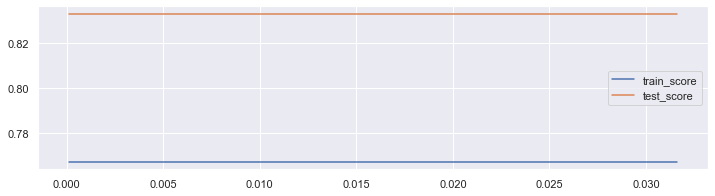

In [166]:
runs = []

from tqdm import tqdm_notebook

for alpha in tqdm_notebook(np.logspace(-4, -1.5, 20)):
    print(alpha)

    model = Lasso(alpha=alpha) # change me between Ridge and Lasso
    model.fit(X_train_r, Y_train_r)

    Y_train_prediced = model.predict(X_train_r)
    Y_test_prediced = model.predict(X_test_r)

    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "train_score": r2_score(Y_train_r, Y_train_predicted),
        "test_score": r2_score(Y_test_r, Y_test_predicted),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["train_score"] for run in runs], label="train_score")
plt.plot([run["alpha"] for run in runs], [run["test_score"] for run in runs], label="test_score")
plt.legend()
plt.show()

Видим, что R2 для тестовой выборки не изменился - 0,8299.

  0%|          | 0/20 [00:00<?, ?it/s]

0.0001
0.00016636142493842227
0.0002767612370754228
0.0004604239376758779
0.0007659678234751839
0.0012742749857031347
0.0021199020238496097
0.0035266992141746592
0.0058670670659931035
0.00976053637307901
0.016237767391887224
0.027013381211330047
0.044939845907216704
0.07476256801637694
0.12437607347260171
0.20691380811147903
0.34422475956860926
0.5726572150091964
0.9526807029019828
1.5848931924611136


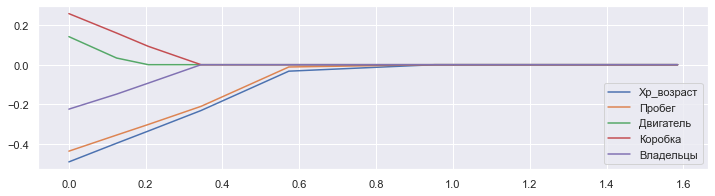

In [180]:
runs = []

from tqdm import tqdm_notebook

for alpha in tqdm_notebook(np.logspace(-4, 0.2, 20)):
    print(alpha)

    model = Lasso(alpha=alpha) # change me between Ridge and Lasso
    model.fit(X_train_r, Y_train_r)

    Y_train_prediced = model.predict(X_train_r)
    Y_test_prediced = model.predict(X_test_r)

    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "train_score": r2_score(Y_train_r, Y_train_predicted),
        "test_score": r2_score(Y_test_r, Y_test_predicted),
    })


plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["coef"] for run in runs], label=col) # col определен выше как название столбиков
plt.legend()
plt.show()

На рисунке выше видно как зануляются наши коэффициенты по мере увеличения alpha. Примерно при alpha = 0.9 зануляются все коэффициенты, что говорит о сильно высокой alpha. Наилучшая модель включает в себя все 5 независимых переменных.